# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# Read the image

In [2]:
image_path = "src/me2.jpg"
compressed_img = "".join(image_path.split(".")[:-1]) + "_compressed." + "".join(image_path.split(".")[-1])
image = Image.open(image_path)
image = image.resize((128, 128))

# Display the image

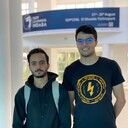

In [3]:
from IPython.display import Image as Image2
Image2(filename=image_path)

## Convert image to 2D matrix

In [4]:
img_mat = np.asanyarray(image) # convert it to 3D matrix (x,y,rgb) <-> rgb = (r,g,b)
img_mat = np.array([[pix[:3] for pix in r ] for r in img_mat])

In [5]:
img_mat.shape

(128, 128, 3)

In [6]:
n, m, rgb = img_mat.shape
nb_clusters = 64

In [7]:
img_mat = img_mat.reshape(n*m, rgb)

## Color Occurrences

In [8]:
colors_occ = {}
for p in img_mat:
    pix = " ".join([str(rgb) for rgb in p])
    if pix not in colors_occ:
        colors_occ[pix] = 0
    else:
        colors_occ[pix]+=1

# Hex Values

In [9]:
def hex_score(pixel):
    return sum(pixel)

In [10]:
colors_values = {}
for p in img_mat:
    pix = " ".join([str(rgb) for rgb in p])
    colors_values[pix] = hex_score(list(map(int, pix.split())))

# My function Psy

In [11]:
occ_mx = max(colors_occ.values())
occ_mn = min(colors_occ.values())
val_mx = max(colors_values.values())
val_mn = min(colors_values.values())

In [12]:
def psy(color_occ, hex_value):
    # standarization 
    
    std_color_occ = (color_occ-occ_mn)/(occ_mx-occ_mn)
    std_color_value = (hex_value - val_mn)/(val_mx-val_mn)
    
    # No STD
    
    #std_color_occ = color_occ
    #std_color_value = hex_value
    
    if std_color_value == 0: return std_color_occ
    return std_color_occ - std_color_value

In [13]:
my_fun = {k: psy(colors_occ[k], colors_values[k]) for k in colors_occ}

## Use highest psy score

In [14]:
srt_psy = sorted(my_fun.items(), key=lambda x:x[1])
srt_psy = [list(map(int, elm[0].split())) for elm in srt_psy]
clusters = srt_psy[::-1][:nb_clusters]
clusters = [pix[:3] for pix in clusters]

## Get the highest occured colors

In [15]:
oc = sorted(colors_occ.items(), key=lambda x:x[1])
oc = [list(map(int, elm[0].split())) for elm in oc]
clusters = oc[::-1][:nb_clusters]
clusters = [pix[:3] for pix in clusters]

In [16]:
def calc_dist(pixel, color):
    ln = 3
    dist = 0
    for i in range(ln):
        dist += (pixel[i]-color[i])**2
    return np.sqrt(dist)

In [17]:
def rnd(x):
    if (int(x)-x) >=0.5:
        return int(x)+1
    return int(x)

In [18]:
def calc_mean(vals, mat):
    mean = sum([mat[i]/len(vals) for i in vals])
    return [rnd(x) for x in mean]

In [19]:
def k_means(image, clusters, epochs=100):
    print("[+] Compressing...\n")
    nm, rgb_ = image.shape
    nb_clustrers = len(clusters)
    zdo = True
    epoch = 0
    while zdo and epoch<epochs:
        epoch += 1
        common_clusters = [[] for i in range(nb_clustrers)]
        zdo = False
        for i in range(nm):
            closer_dist = 500 # highest possible distance is 441,6
            pix = list(image[i])
            ind=0
            for k in range(nb_clustrers):
                if calc_dist(pix, clusters[k]) < closer_dist:
                    closer_dist = calc_dist(pix, clusters[k])
                    ind=k
            common_clusters[ind].append(i)

        for k in range(nb_clustrers):
            cmn = common_clusters[k]
            if len(cmn) == 0:
                continue
            mean = calc_mean(cmn, image)
            if clusters[k] != mean:
                zdo = True
            clusters[k] = mean
            for x in cmn:
                if sum(image[x]) > sum(mean):
                    image[x] = mean
                    continue
                image[x] = mean
        print("[+] Epochs :", epoch)
    return image

In [20]:
image = img_mat.copy()

In [21]:
img = k_means(image, clusters)

[+] Compressing...

[+] Epochs : 1
[+] Epochs : 2
[+] Epochs : 3
[+] Epochs : 4
[+] Epochs : 5
[+] Epochs : 6
[+] Epochs : 7
[+] Epochs : 8
[+] Epochs : 9
[+] Epochs : 10
[+] Epochs : 11
[+] Epochs : 12
[+] Epochs : 13
[+] Epochs : 14
[+] Epochs : 15
[+] Epochs : 16
[+] Epochs : 17
[+] Epochs : 18
[+] Epochs : 19
[+] Epochs : 20
[+] Epochs : 21
[+] Epochs : 22
[+] Epochs : 23
[+] Epochs : 24
[+] Epochs : 25
[+] Epochs : 26
[+] Epochs : 27
[+] Epochs : 28
[+] Epochs : 29
[+] Epochs : 30
[+] Epochs : 31
[+] Epochs : 32
[+] Epochs : 33
[+] Epochs : 34


In [22]:
img = img.reshape(n, m, rgb)
new_image = Image.fromarray(img)

In [23]:
new_image.save(compressed_img)